# Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style = "white")
sns.set(style = "whitegrid", color_codes = True)

# Reading the dataset

In [4]:
data =pd.read_csv('third attempt.csv')

In [3]:
data

,ID,Sex,Age,New customers' index,Customer seniority,Primary customer,Customer type,Cusomer relation,Activity index,Income
0,1375586,1,35,0,6,1,1,1,1,87218
1,1050611,2,23,0,35,1,1,0,0,35549
2,1050612,2,23,0,35,1,1,0,0,122179
3,1050613,1,22,0,35,1,1,0,0,119776
4,1050614,2,23,0,35,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
9994,1065714,1,23,0,34,1,1,1,1,156032
9995,1065716,2,27,0,34,1,1,0,0,79357
9996,1065717,2,24,0,34,1,1,0,0,652313
9997,1065719,1,23,0,34,1,1,0,0,130380


In [3]:
data['Customer type'].unique()

array([1, 0], dtype=int64)

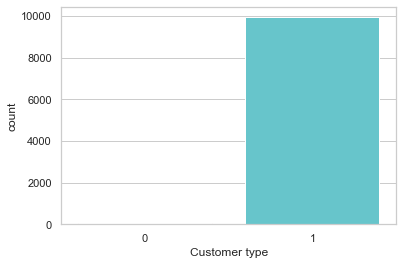

In [6]:
sns.countplot(x = 'Customer type', data = data, palette = 'hls')
plt.show()

In [5]:
count_no_sub = len(data[data['Customer type'] == 0])
count_sub = len(data[data['Customer type'] == 1])
pct_of_no_sub = count_no_sub / (count_no_sub + count_sub)
print("Percentage of newer customers...", pct_of_no_sub * 100)
pct_of_sub = count_sub / (count_no_sub + count_sub)
print("Percentage of senior customers...", pct_of_sub * 100)


Percentage of newer customers... 0.0
Percentage of senior customers... 100.0


In [9]:
data.groupby('Customer seniority').mean()

,ID,Sex,Age,New customers' index,Primary customer,Customer type,Cusomer relation,Activity index,Income
Customer seniority,,,,,,,,,
0,1.050004e+06,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,1.043711e+06,2.000000,31.000000,1.0,1.000000,1.0,1.000000,0.500000,120800.500000
3,1.042509e+06,2.000000,20.000000,1.0,1.000000,1.0,0.000000,1.000000,115324.000000
4,1.042486e+06,1.000000,23.000000,1.0,1.000000,1.0,0.000000,1.000000,79017.000000
6,1.165262e+06,1.333333,38.000000,0.0,1.000000,1.0,0.666667,1.000000,57314.666667
7,1.050586e+06,1.500000,47.500000,0.0,1.000000,1.0,0.500000,0.500000,101579.500000
8,1.055712e+06,2.000000,34.000000,0.0,1.000000,1.0,0.000000,1.000000,117594.000000
9,1.052704e+06,1.400000,34.400000,0.0,1.000000,1.0,0.200000,0.200000,96072.000000
10,1.053191e+06,1.333333,30.666667,0.0,1.000000,1.0,1.000000,1.000000,116905.000000


In [10]:
data.groupby('Age').mean()

,ID,Sex,New customers' index,Customer seniority,Primary customer,Customer type,Cusomer relation,Activity index,Income
Age,,,,,,,,,
0,1.050004e+06,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
4,1.052690e+06,2.000000,0.0,35.000000,1.0,1.0,1.000000,1.000000,241635.000000
5,1.049090e+06,1.000000,0.0,35.000000,1.0,1.0,1.000000,1.000000,132980.500000
6,1.054247e+06,1.285714,0.0,34.571429,1.0,1.0,1.000000,1.000000,150471.142857
7,1.050980e+06,1.333333,0.0,34.666667,1.0,1.0,0.666667,0.666667,92285.000000
...,...,...,...,...,...,...,...,...,...
89,1.049041e+06,1.500000,0.0,34.500000,1.0,1.0,0.500000,0.500000,14386.500000
92,1.045060e+06,2.000000,0.0,35.000000,1.0,1.0,0.500000,0.500000,104601.500000
93,1.042770e+06,1.000000,0.0,35.000000,1.0,1.0,1.000000,1.000000,0.000000


# Create dummy variables

In [6]:
cat_vars = ['Customer seniority', 'Income', 'Age']
for var in cat_vars:
    cat_list = 'var' + '_' + var 
    cat_list = pd.get_dummies(data[var], prefix = var)
    data1 = data.join(cat_list)

cat_vars = ['Customer seniority', 'Income', 'Age']
data_vars = data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [7]:
data_final = data[to_keep]
data_final.columns.values

array(['ID', 'Sex', 'New customer index', 'Primary customer',
       'Customer type', 'Customer relation', 'Activity index'],
      dtype=object)

# Over-sampling using SMOTE

In [8]:
X = data_final.loc[:, data_final.columns != 'Customer type']
y = data_final.loc[:, data_final.columns == 'Customer type']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
columns = X_train.columns
os_data_X, os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data = os_data_X, columns = columns )
os_data_y = pd.DataFrame(data = os_data_y, columns = ['ID'])
# we can Check the numbers of our data
print("length of oversampled data is...", len(os_data_X))
print("Number of newer customers in oversampled data;  ", len(os_data_y[os_data_y['ID'] == 0]))
print("Number of senior customers;  ", len(os_data_y[os_data_y['ID'] == 1]))
print("Proportion of newer customers data in oversampled data is;  ",len(os_data_y[os_data_y['ID'] == 0]) / len(os_data_X))
print("Proportion of senior customers data in oversampled data is;  ",len(os_data_y[os_data_y['ID'] == 1]) / len(os_data_X))

length of oversampled data is... 13924
Number of newer customers in oversampled data;   0
Number of senior customers;   0
Proportion of newer customers data in oversampled data is;   0.0
Proportion of senior customers data in oversampled data is;   0.0


# Logistic Regression Model Fitting

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\adana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [10]:
y_pred = logreg.predict(X_test)
print('Accuracy of the logisitc classifier on the test dataset: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of the logisitc classifier on the test dataset: 1.00


In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2987    0]
 [  13    0]]


# Compute precision, recall, F-measure and support

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2987
           2       0.00      0.00      0.00        13

    accuracy                           1.00      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.99      1.00      0.99      3000



C:\Users\adana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# ROC Curve

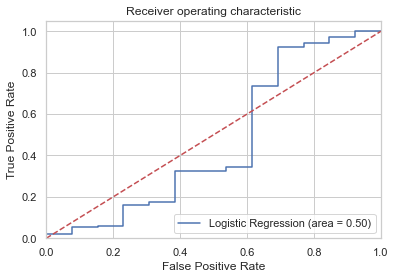

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' %logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.savefig('Log_ROC')
plt.show()